<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/Kmean_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
url='https://dsserver-prod-resources-1.s3.amazonaws.com/40/nba_2013.csv'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
nba = pd.read_csv(url)

In [0]:
point_guards = nba[nba['pos'] == 'PG'].copy()

In [0]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

In [0]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

Text(0, 0.5, 'Assist Turnover Ratio')

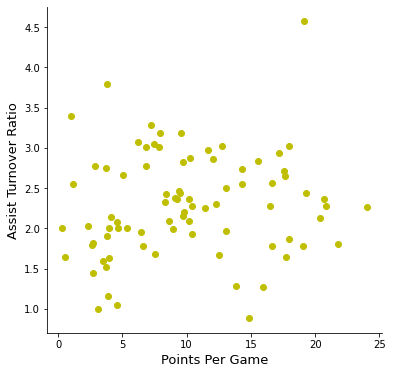

In [63]:
figure= plt.figure(figsize=(6,6))
ax1=figure.add_subplot(1,1,1)
ax1.scatter(point_guards['ppg'], point_guards['atr'], c='y')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Points Per Game', fontsize=13)
ax1.set_ylabel('Assist Turnover Ratio', fontsize=13)

In [64]:
np.random.choice(point_guards.index, size=5)

array([371,  87, 347, 136,  97])

In [0]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

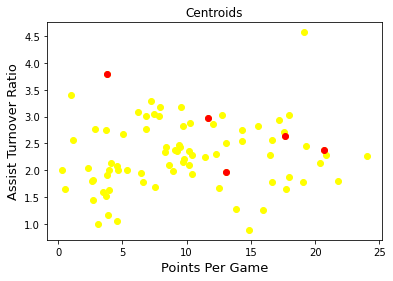

In [66]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [67]:
random_initial_points

array([374, 450, 221, 272, 360])

In [0]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [69]:
centroids_dict

{0: [11.666666666666666, 2.9696969696969697],
 1: [17.65753424657534, 2.6449704142011834],
 2: [13.0875, 1.9702380952380953],
 3: [20.670731707317074, 2.3678756476683938],
 4: [3.8181818181818183, 3.8]}

In [70]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


In [0]:
# Add the function, `assign_to_cluster`
# This creates the column, `cluster`, by applying assign_to_cluster row-
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

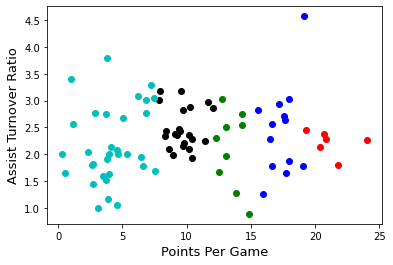

In [72]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [0]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

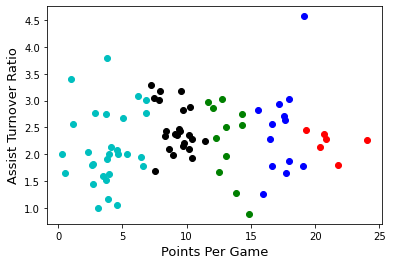

In [74]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

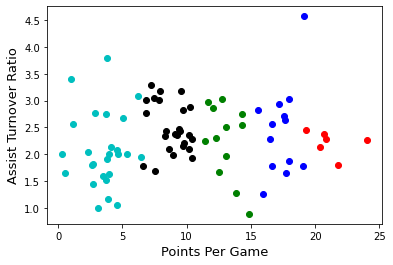

In [75]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

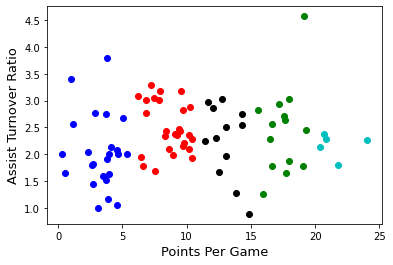

In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

In [0]:
point_guards['kmeans_label']=kmeans.labels_

In [0]:
import seaborn as sns

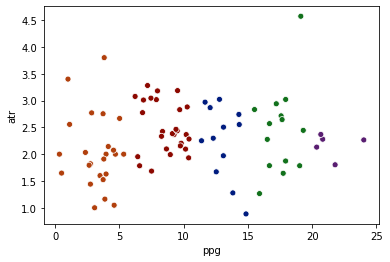

In [91]:
cmap = sns.cubehelix_palette(dark=.10, light=.8, as_cmap=True)
sns.scatterplot(x='ppg',y='atr',hue='kmeans_label',data=point_guards,palette='dark',legend=False)

In [0]:
#point_guards.head()

In [0]:
sample=point_guards.loc[24,['ppg', 'atr']].values.reshape(1,-1)

In [107]:
kmeans.predict(sample)

array([0], dtype=int32)

In [111]:
point_guards.loc[24,:]['kmeans_label']

0

In [114]:
kmeans.cluster_centers_

array([[13.01805138,  2.25070481],
       [ 3.25103221,  2.03206018],
       [17.48314351,  2.45463901],
       [ 8.61444883,  2.48981711],
       [21.52605691,  2.16916888]])

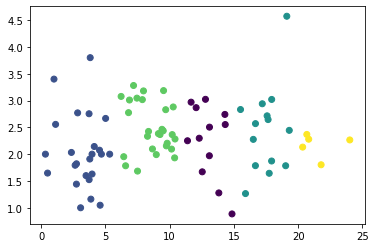

In [118]:
plt.scatter(x=point_guards['ppg'],y=point_guards['atr'],c=kmeans.labels_)